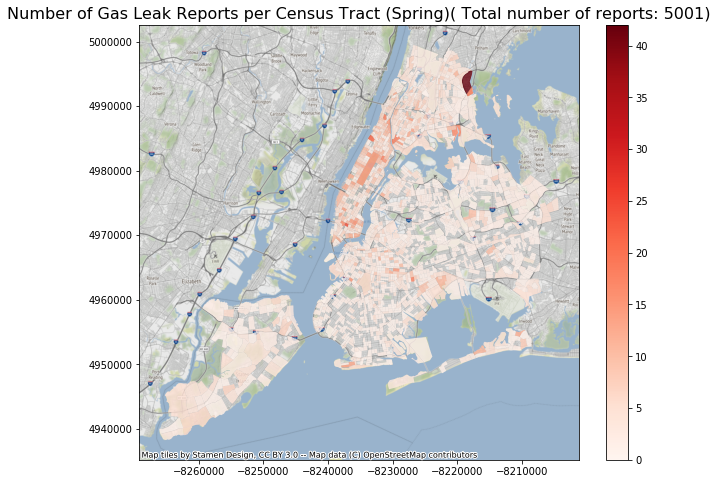

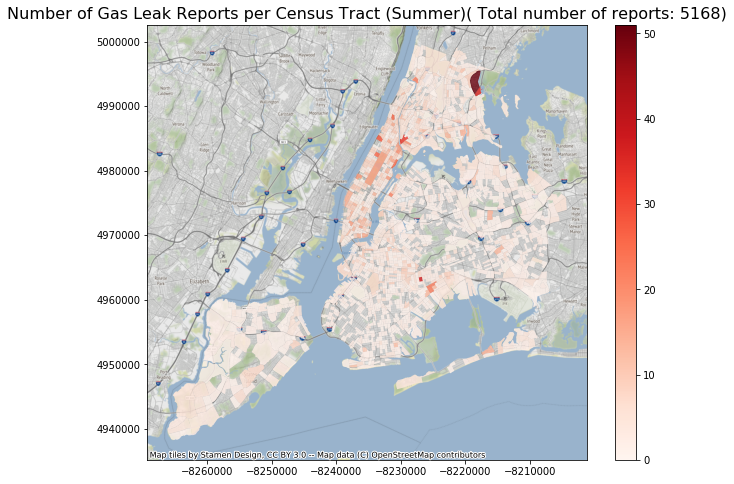

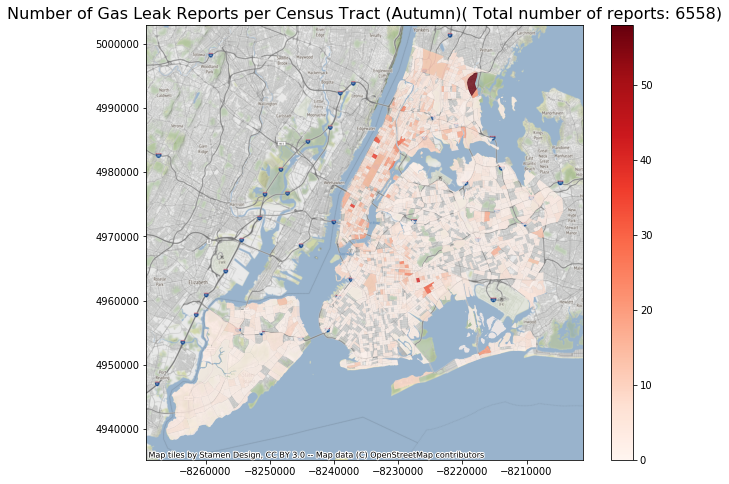

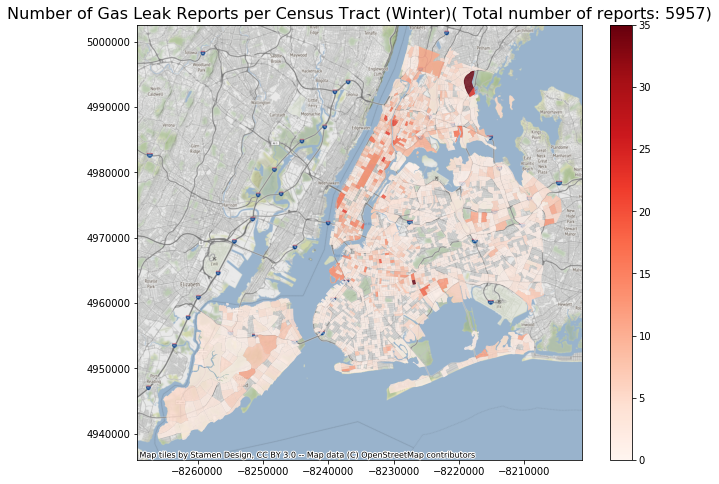

In [16]:
import os
import pandas as pd
import geopandas as gpd
import platform
import matplotlib.pyplot as plt
import contextily as ctx
from tabulate import tabulate
import numpy as np

#shp_file = 'tl_2019_36_tract/tl_2019_36_tract.shp'
shp_file = 'nyu_2451_34505/nyu_2451_34505.shp'
us_tract = gpd.read_file(shp_file)
#shp_file = 'NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp'
csvfile = 'Geoid_Count2018.csv'
data = pd.read_csv(csvfile)

Season = [['03','04','05'],['06','07','08'],['09','10','11'],['12','01','02']]
Season_word = ['Spring','Summer','Autumn','Winter']
#Month = ['01','02','03','04','05','06','07','08','09','10','11','12']
#Month_word = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(0,4):
    Month_data = pd.DataFrame(columns = ['Time','Geoid','NumberOfReports']) # create a new Dataframe with each month
    info = np.array(['SpringCT36047089000','SpringCT36081043701']) 
    count = np.array([0,0])   
    for row in range(0,len(data)): # counting all data seasonly
        # creating a string with all the details we need
        if data.iat[row,0][0:2] == Season[i][0] or data.iat[row,0][0:2] == Season[i][1] or data.iat[row,0][0:2] == Season[i][2]:
            detail = Season_word[i] + 'CT' + str(data.iat[row,1])

            if detail in info:                          # if the string already exist, we will just increment the count
                itemindex = np.where(info == detail)
                count[itemindex[0][0]] += data.iat[row,2]
            else:                                       # else we will have to add the string to info array and create an extra count
                info = np.append(info,detail)
                count = np.append(count,data.iat[row,2])
    
    for row in range(0,len(info)):
        Month_data = Month_data.append({'Time' : info[row][0:6], 'Geoid' : info[row][8:],  'NumberOfReports': count[row] } , ignore_index=True)

    us_tract['Geoid'] = us_tract['tractid'].str.upper()              # create a new column of the same name as DF from 'NAME'
                                                                    # In shp file, the "NAME" is the census tract
                                                                    # In shp file, the "tractid" is the geoid
    us_tract['Geoid'] = us_tract.Geoid.astype(float)        # Conver type to float so we can merge the DFs
                                                                 # We use merge to pass in the data(NumOfReports)from the csv
    Month_data['Geoid'] = Month_data.Geoid.astype(float)
    Month_data['NumberOfReports'] = Month_data.NumberOfReports.astype(int)
    join = us_tract.merge(Month_data, on='Geoid')
    Total = join['NumberOfReports'].sum()


    #plot with background map
    df = join.to_crs(epsg=3857) 
    ax = df.plot(column='NumberOfReports',cmap='Reds',figsize = (10,8),alpha = 0.8,legend = True)
    ax.set_title(label = 'Number of Gas Leak Reports per Census Tract (' + Season_word[i] + ')' + '( Total number of reports: '+ str(Total)+')', fontdict={'fontsize': 16}, loc='center')
    ctx.add_basemap(ax,zoom = 12)


In [17]:
#for i in range(0,4):
#    Month_data = pd.DataFrame(columns = ['Time','Geoid','NumberOfReports']) # create a new Dataframe with each month
#    for row in range(0,len(data)):
#        if data.iat[row,0][0:2] == Season[i][0] or data.iat[row,0][0:2] == Season[i][1] or data.iat[row,0][0:2] == Season[i][2]:    
#            Month_data = Month_data.append({'Time' : Season_word[i], 'Geoid' : data.iat[row,1],  'NumberOfReports': data.iat[row,2] } , ignore_index=True)#

#    for row in range(0,len(Month_data)):
#        if Month_data.iat[row,2] >= 20:
#            print(Month_data.loc[[row]])
#            print()
            
# Average population: 3000 - 4000 per census tract            
# The one on top corner of bronx is 36005046201  (186 total point)
#                       Population: 28272,  area: 0.8 square mile
# The one on the right-mid section of brooklyn is very small: 36047091000 (131 total points)
#                               (super highlighted for December)

In [19]:
vertify = gpd.read_file(shp_file)
vertify['Geoid'] = vertify['tractid'].str.upper()
vertify['Geoid'] = vertify.Geoid.astype(int)
data['Geoid'] = data.Geoid.astype(float)
data['NumberOfReports'] = data.NumberOfReports.astype(int)
test = vertify.merge(data, on='Geoid')
count = 0
count2 = 0
for row in range(0,len(test)):
    if test.at[row,'Geoid'] == 36005046201:
        count += test.at[row,'NumberOfReports']
    elif test.at[row,'Geoid'] == 36047091000:
        count2 += test.at[row,'NumberOfReports']
        
print(count)
print(count2)


186
131


In [20]:
nyc = ['005',    '047',     '061',   '081',    '085']
    # bronx     kings     new york   queens   richmond
    #        (brooklyn)  (manhatton)          (staten island)
population = [1432000,2533000,1629000,2273000,476200]
reportcount = [0,0,0,0,0]

for row in range(0,len(test)):
    if test.at[row,'bcode'][2:] == nyc[0]:
        reportcount[0] += test.at[row,'NumberOfReports']
    elif test.at[row,'bcode'][2:] == nyc[1]:
        reportcount[1] += test.at[row,'NumberOfReports']
    elif test.at[row,'bcode'][2:] == nyc[2]:
        reportcount[2] += test.at[row,'NumberOfReports']
    elif test.at[row,'bcode'][2:] == nyc[3]:
        reportcount[3] += test.at[row,'NumberOfReports']
    elif test.at[row,'bcode'][2:] == nyc[4]:
        reportcount[4] += test.at[row,'NumberOfReports']
        
# when added up all the number we get from report count we also get total number 
# of reports from the FDNY2018.csv

In [21]:
table = [['Bronx',reportcount[0],reportcount[0]/population[0]], ['Brooklyn',reportcount[1],reportcount[1]/population[1]], 
         ['Manhatton',reportcount[2],reportcount[2]/population[2]],['Queens',reportcount[3],reportcount[3]/population[3]], 
         ['Staten Island',reportcount[4],reportcount[4]/population[4]]]
print(tabulate(table, headers=["Borough","Gas Leak Report per Borough","Population/Number of Report"],tablefmt="github"))


| Borough       |   Gas Leak Report per Borough |   Population/Number of Report |
|---------------|-------------------------------|-------------------------------|
| Bronx         |                          5209 |                    0.00363757 |
| Brooklyn      |                          6396 |                    0.00252507 |
| Manhatton     |                          6300 |                    0.0038674  |
| Queens        |                          3890 |                    0.00171139 |
| Staten Island |                           889 |                    0.00186686 |
